# Deslocamento e equalização de imagem
#Daniel Anderson de Souza Leite
#Engenharia de Telecomunicações - IFCE
#Sistemas Multimídia
#Prof. Dr. Pedrosa

# Bibliotecas 

In [19]:
import cv2 #OpenCV
import numpy as np #biblioteca para trabalhar com arrays de maneira eficiente
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import math
from copy import copy
import statistics

# Leitura

In [20]:
img = cv2.imread('C:/Users/danie/Desktop/Scripsts Python/figs/house.tif', cv2.IMREAD_GRAYSCALE)

#Mostra o tamanho da imagem
print("Tamanho da imagem")
np.shape(img)

Tamanho da imagem


(512, 512)

# Imagem de saída

In [21]:
#Recebe o tamanho da imagem original
(c,d)=np.shape(img)

#Cria uma matriz de zeros do mesmo tamanho da img original
imgout=np.zeros((c,d), dtype=np.uint8)


#Tamanho da imagem de saída
print("Tamanho da imagem:")
np.shape(imgout)

Tamanho da imagem:


(512, 512)

# Processamento - Equalização de Histograma

In [22]:
#translada se negativo e equaliza
def shiftequalizer(imagem):
    #Varre a imagem ampliada realizando o equalizamento de histograma.    
    imax=255
    minn=imagem.min()
    maxx=imagem.max()
    (c,d)=np.shape(imagem)
    temp=np.zeros((c,d), dtype=np.int16)
    img_saida=copy(imagem)

    if (minn < 0):
        #Varre a imagem
        print("entrou 1")
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]+(minn*-1)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()
    

    if(maxx>255):
        #Varre a imagem
        print("entrou 2")
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]-(minn)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()

    #Equaliza a imagem
    for x in range(c):
        for y in range(d):
            temp[x][y] = ((img_saida[x][y]-minn)/(maxx-minn))*imax
    img_saida=copy(temp)
    img_saida=np.array(img_saida, dtype=np.uint8)
    return img_saida  

imgout=shiftequalizer(img)

In [23]:
# Pixels intensity da imagem de saída
print('\n'+"Pixels intensity da imagem de saída")
print('Max value: {}'.format(imgout.max()))
print('Min value: {}'.format(imgout.min()) +'\n')


#Mostra parcialmente a imagem de saída
print('\n'+'\n'+"Matriz da imagem de saída:")
print(imgout)


Pixels intensity da imagem de saída
Max value: 255
Min value: 0



Matriz da imagem de saída:
[[203 203 203 ... 203 203 203]
 [203 203 203 ... 203 203 203]
 [204 204 204 ... 204 204 204]
 ...
 [201 202 203 ... 122 153 162]
 [194 198 202 ... 123 154 162]
 [189 194 201 ... 125 155 163]]


# Imagem de entrada para comparação

In [24]:
# Pixels intensity da imagem original
print('\n'+"Pixels intensity da imagem de entrada")
print('Max value: {}'.format(img.max()))
print('Min value: {}'.format(img.min())+'\n')

#Mostra parcialmente a imagem original para fins de comparação
print("Matriz da imagem de entrada:")
print(img)


Pixels intensity da imagem de entrada
Max value: 254
Min value: 0

Matriz da imagem de entrada:
[[203 203 203 ... 203 203 203]
 [203 203 203 ... 203 203 203]
 [204 204 204 ... 204 204 204]
 ...
 [201 202 203 ... 122 153 162]
 [194 198 202 ... 123 154 162]
 [189 194 201 ... 125 155 163]]


# Exibição pela matplotlib.pyplot

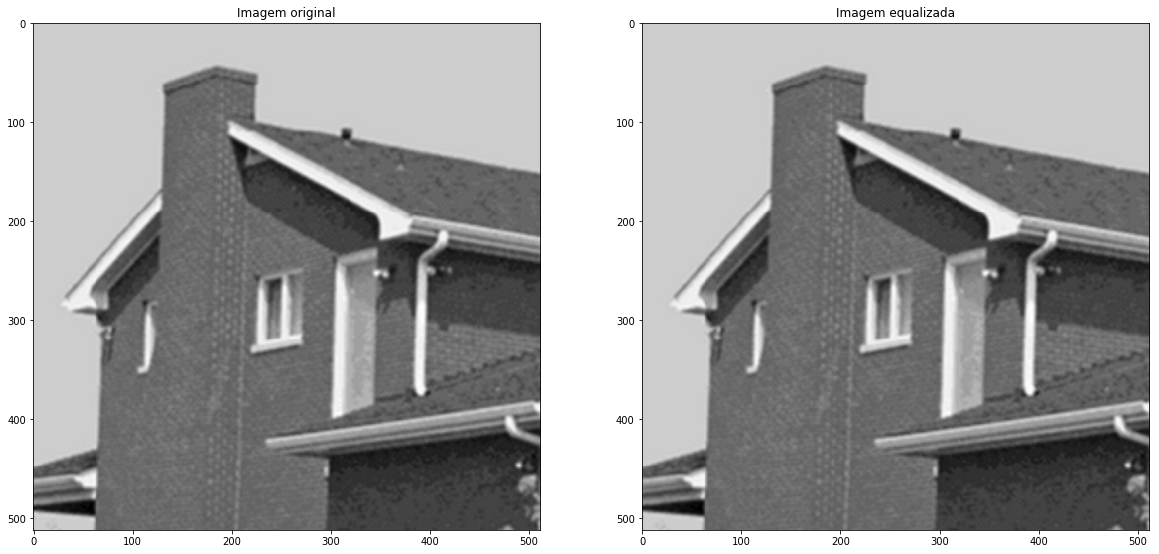

In [25]:
########## Using matplotlib #################

plt.figure(1, [20, 20])
plt.subplot(121), plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(imgout, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Imagem equalizada')

plt.show()

# Exibição pela Open CV

In [10]:
# Exibe a imagem de saída pela opencv em uma janela
cv2.imshow("Imagem", imgout)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [81]:
# Exibe a imagem de entrada pela opencv em uma janela
cv2.imshow("Imagem", img)
cv2.waitKey(0)

-1

# Histograma

Histogram shift and equalizer


<StemContainer object of 3 artists>

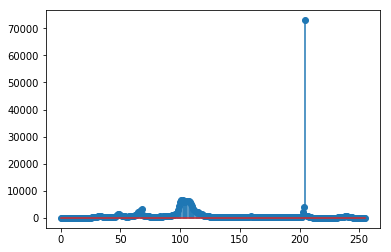

In [26]:
# Using opencv
# Mostra o histograma da imagem de saída
hist = cv2.calcHist([imgout], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histogram shift and equalizer")
plt.stem(hist)

Histograma da imagem original


<StemContainer object of 3 artists>

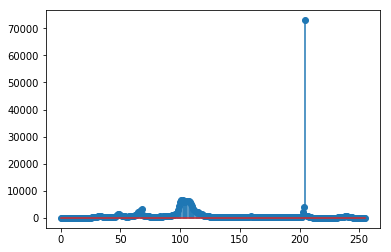

In [27]:
# Mostra o histograma da imagem original
hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histograma da imagem original")
plt.stem(hist)

# Savar a imagem processada

In [57]:

cv2.imwrite('C:/Users/danie/Desktop/Scripsts Python/figs/Arquivos processados/img_equalizada.png', imgout)

True